<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import ast
from textblob import TextBlob   #0.17.1
import pandas as pd
import folium
import webbrowser
import textwrap
from folium.plugins import MarkerCluster

In [5]:
Ubicacion = "gs://gmy/Datasets_ML"
NombreDelArchivo = 'df_ML_promedios_Final'
Extension = '.parquet'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
# Lee el archivo Parquet directamente en un DataFrame de pandas
df_ML_promedios_Final = pd.read_parquet(file, storage_options={"project": "Proyecto Final - Henry"})
df_ML_promedios_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49334 entries, 0 to 49333
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_id                         49334 non-null  object 
 1   name                                49334 non-null  object 
 2   address                             49334 non-null  object 
 3   city                                49334 non-null  object 
 4   state                               49334 non-null  object 
 5   postal_code                         49334 non-null  object 
 6   latitude                            49334 non-null  float64
 7   longitude                           49334 non-null  float64
 8   stars                               49334 non-null  float64
 9   review_count                        49334 non-null  int16  
 10  is_open                             49334 non-null  int8   
 11  RestaurantsTakeOut                  49334

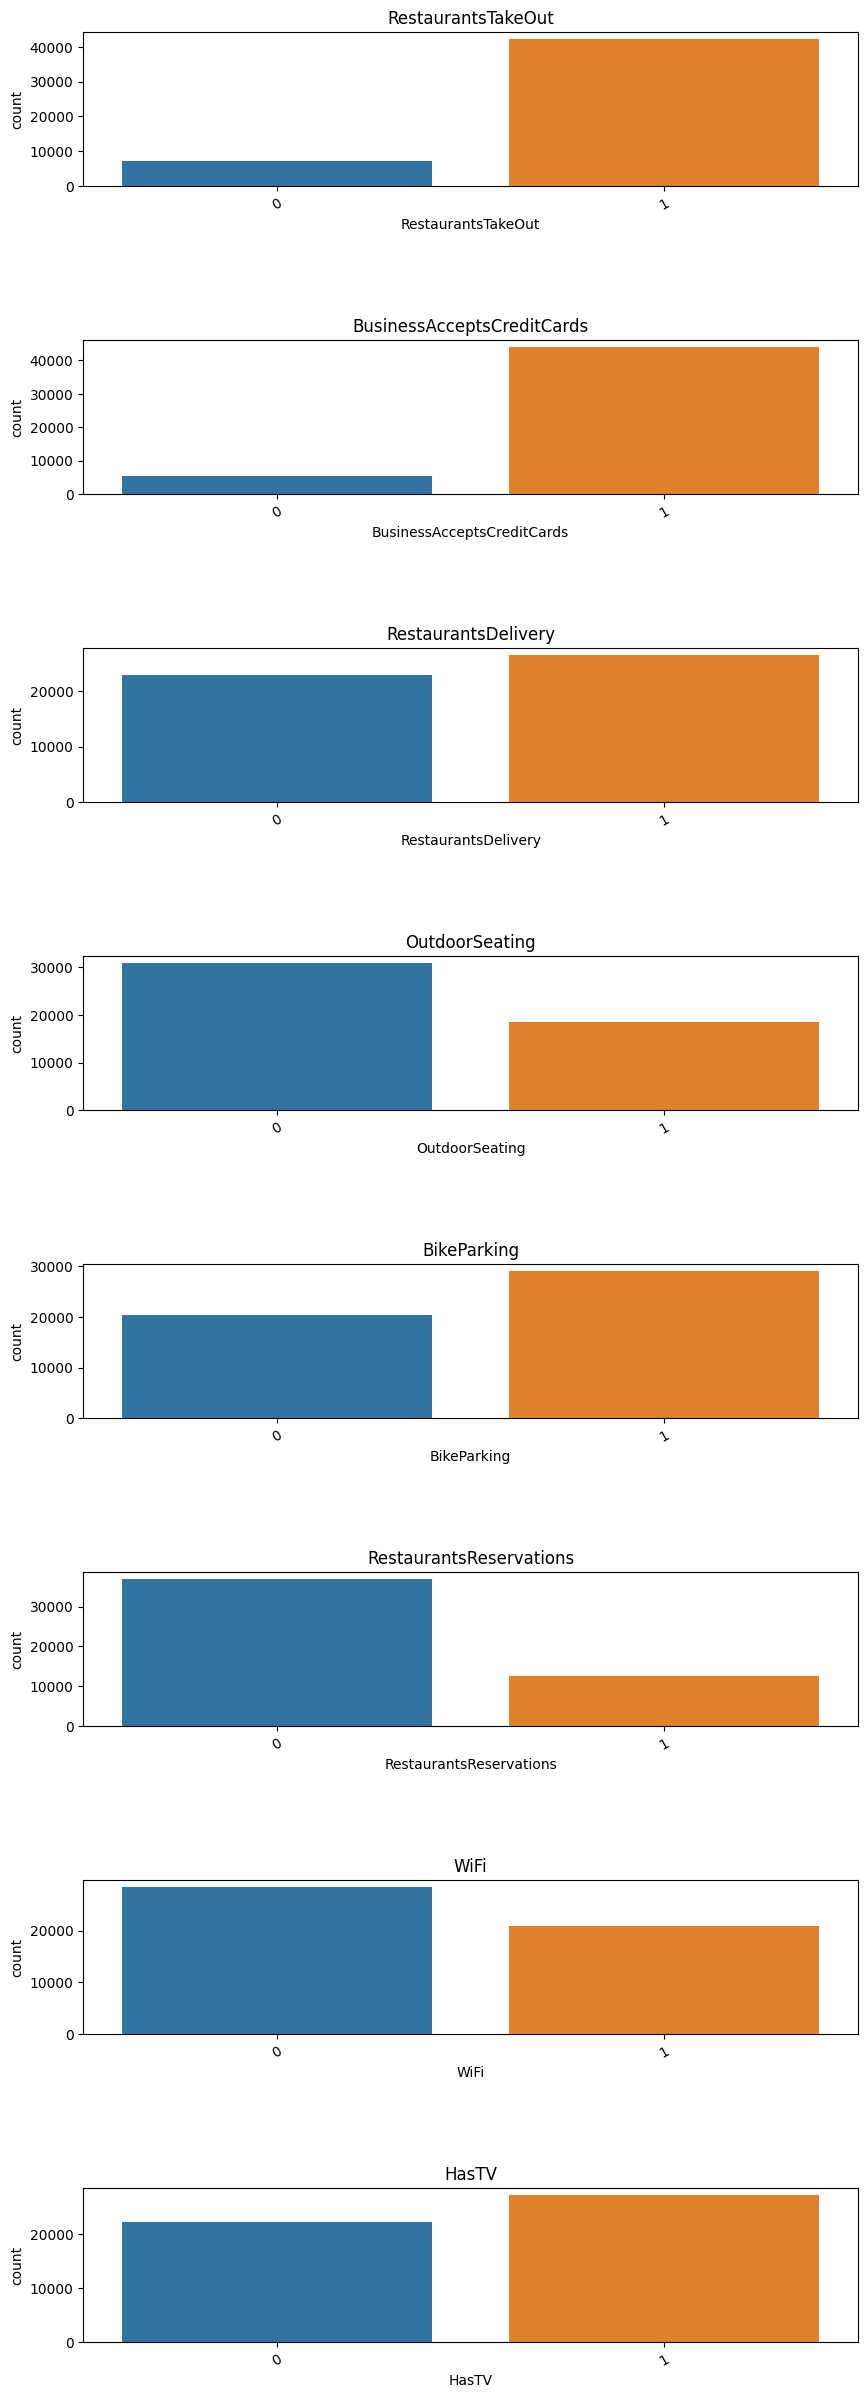

In [6]:
# Graficando algunos campos y sus categorias

columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_ML_promedios_Final, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [ ]:
#buket S3.
#s3://sagemaker-studio-2iscigekka5

In [9]:
# Se salva el dataframe con un archivo en formato parquet
Ubicacion = "gs://gmy/Datasets_ML"
NombreDelArchivo = 'df_ML_promedios_Final'
Extension = '.csv'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
df_ML_promedios_Final.to_csv(file)